In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import sys 
import os
path = os.path.dirname(os.getcwd())
sys.path.append(path)
from lib import *

In [2]:
# Results Import
optimization_result = pd.read_csv("../results/1_optimization_result.csv")
baseline_result = pd.read_csv("../results/2_baseline.csv")
simpleCA_result = pd.read_csv("../results/3_simpleCA_result.csv")
randomizedEB_result = pd.read_csv("../results/4_randomEB_optimization.csv")
leftover_result = pd.read_csv("../results/5_leftover_optimization_result.csv")
leftover_resultWeighted = pd.read_csv("../results/7_leftoverWeighted_optimization_result.csv")

#op_baseline_result = pd.read_csv("../results/8_baselineOptimization_result.csv")


# Data Import
df = pd.read_csv(r'../data/DE_2020.csv')
ci_data_2020 = df['carbon_intensity_avg']
df = pd.read_csv(r'../data/DE_2021.csv')
ci_data_2021 = df['carbon_intensity_avg']
df = pd.read_csv(r'../data/projectcount_wikiDE_2014.csv')
clickData_hourly_2014 = df["de"]
df = pd.read_csv(r'../data/projectcount_wikiDE_2015.csv')
clickData_hourly_2015 = df["De"].tolist()
clickData_hourly_2015 = clickData_hourly_2015[24:] + clickData_hourly_2015[0:24]

carbonBudget = calcCarbonBudgetHourInWeekAVG(2020,clickData_hourly_2014,ci_data_2020)

# Carbon Budget Utilization (in %)

In [3]:
weekday_frequency = weekdayfrequency(2021)
s = weekday_frequency.index(53)*24
optimal_cb = []
simple_cb = []
baseline_lp_cb = []
baseline_np_cb = []
baseline_hp_cb = []
randomEB_cb = []
leftover_result_cb = []
leftover_resultWeighted_cb = []

#op_cb = []
for i in range(8760):
    index = (i+s) % 168
    optimal_cb.append(optimization_result['ce'][i] / carbonBudget[index])
    simple_cb.append(simpleCA_result['ce'][i]  / carbonBudget[index])
    baseline_lp_cb.append((baseline_result['lp'][i]*ci_data_2021[i]) / carbonBudget[index])
    baseline_np_cb.append((baseline_result['np'][i]*ci_data_2021[i]) / carbonBudget[index])
    baseline_hp_cb.append((baseline_result['hp'][i]*ci_data_2021[i]) / carbonBudget[index])
    randomEB_cb.append(randomizedEB_result['ce'][i]  / carbonBudget[index])
    leftover_result_cb.append(leftover_result['ce'][i]  / carbonBudget[index])
    leftover_resultWeighted_cb.append(leftover_resultWeighted['ce'][i]  / carbonBudget[index])

    #op_cb.append(op_baseline_result['ed'][i] * ci_data_2021_hourly[i]  / cb_perHour[(i+96) % 168]*100)
a = sorted(optimal_cb)
b = sorted(simple_cb)
c = sorted(baseline_lp_cb)
d = sorted(baseline_np_cb)
e = sorted(baseline_hp_cb)

/tmp/ipykernel_574372/1103829954.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  sorted_CBU.set_yticklabels(percentage, fontdict={'size': 15})


Text(0, 0.5, 'Carbon Budget Utilisation (in %)')

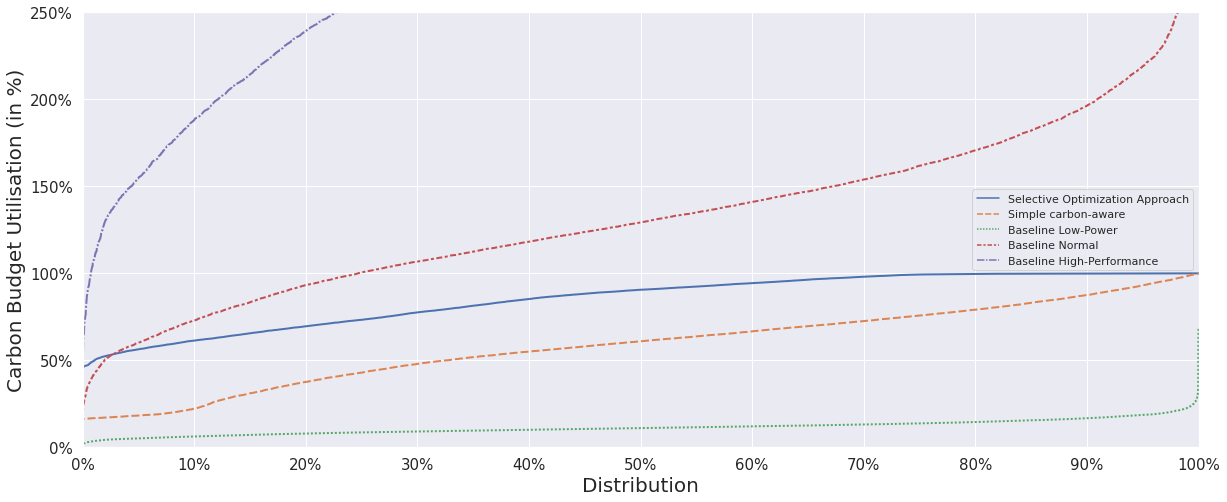

In [4]:
# Seaborn Figure size
sns.set(rc={'figure.figsize':(20,8)})
data = pd.DataFrame({'Selective Optimization Approach': a, 'Simple carbon-aware': b, 'Baseline Low-Power': c, 'Baseline Normal': d, 'Baseline High-Performance': e})

y_upperLimit = 2.5

sorted_CBU = sns.lineplot(data=data, linewidth=2)
sorted_CBU.set(xlim=(0,8760), ylim=(0,y_upperLimit))
xlabels = [math.ceil(x*876) for x in range(0,11)]
percentage = [format(x*10) + '%' for x in range(0,11)]
sorted_CBU.set_xticks(xlabels)
sorted_CBU.set_xticklabels(percentage, fontdict={'size': 15})

percentage = [format(math.floor(x*20*y_upperLimit)) + '%' for x in range(0,6)]
#sorted_EBU.set_yticks(ylabels)
sorted_CBU.set_yticklabels(percentage, fontdict={'size': 15})
#sorted_EBU.xaxis.set_major_locator(ticker.FixedLocator(xlabels))
#sorted_EBU.xaxis.set_major_formatter(ticker.PercentFormatter(xlabels))
sorted_CBU.set_xlabel('Distribution', fontdict={'size': 20})
sorted_CBU.set_ylabel('Carbon Budget Utilisation (in %)', fontdict={'size': 20})

#sorted_EBU.axes.set_title("CDF Energy Budget Utilization",fontsize=20)


In [5]:
# Save plot to disk
fig = sorted_CBU.get_figure()
fig.savefig("../img/comparingCBU_cdf.png", bbox_inches = 'tight')

In [6]:
# Statistics

count_a = 0
count_b = 0
count_c = 0
count_d = 0
count_e = 0

for i in range(len(a)):
    if a[i] <= 1.0:
        count_a+=1
    if b[i] <= 1.0:
        count_b+=1
    if c[i] <= 1.0:
        count_c+=1
    if d[i] <= 1.0:
        count_d+=1
    if e[i] <= 1.0:
        count_e+=1

# print("Number of times Selective is below CB: " + str(count_e))
# print("Percentage of times Selective is below CB: " + str(count_e/len(e)))
# print("Number of times HP is below CB: " + str(count_e))
# print("Percentage of times HP is below CB: " + str(count_e/len(e)))
print("Number of times LP is below CB: " + str(count_c))
print("Percentage of times LP is below CB: " + str(count_c/len(c)))
print("Number of times NP is below CB: " + str(count_d))
print("Percentage of times NP is below CB: " + str(count_d/len(d)))

print("Number of times HP is below CB: " + str(count_e))
print("Percentage of times HP is below CB: " + str(count_e/len(e)))

print("NP is better than HP " + str(count_d/count_e))
# optimization_ce = sum([optimization_result['ed'][i] * ci_data_2021_hourly[i] for i in range(8760)])
# simple_ce = sum([simpleCA_result['ed'][i] * ci_data_2021_hourly[i] for i in range(8760)])
# print(carbonBudget_anually - optimization_ce)
# print(carbonBudget_anually - simple_ce)
# print(max(optimal_cb))

Number of times LP is below CB: 8760
Percentage of times LP is below CB: 1.0
Number of times NP is below CB: 2160
Percentage of times NP is below CB: 0.2465753424657534
Number of times HP is below CB: 66
Percentage of times HP is below CB: 0.007534246575342466
NP is better than HP 32.72727272727273


## Weekly Boxplot

In [7]:
DaysMonths = [31,28,31,30,31,30,31,31,30,31,30,31]
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sIndex = 0
optiBox = []
simpleBox = []

#data = pd.DataFrame({'Month', 'Hourly Optimization Approach': optiBox, 'Simple carbon-aware'})

# Because we focus on 2021 and therefore start on a Friday:
optiBox.append(optimal_cb[sIndex:3*24])
simpleBox.append(simple_cb[sIndex:sIndex+(3*24)])
sIndex += 3*24
for i in range(1,52):
    optiBox.append(optimal_cb[sIndex:sIndex+(7*24)])
    simpleBox.append(simple_cb[sIndex:sIndex+(7*24)])
    sIndex += 7*24
# Last week: 
optiBox.append(optimal_cb[sIndex:len(optimal_cb)])
simpleBox.append(simple_cb[sIndex:len(simple_cb)])
sIndex = len(optimal_cb)

flat_optiBox = [item for sublist in optiBox for item in sublist]
flat_simpleBox = [item for sublist in simpleBox for item in sublist]
index_labels = [item+1 for item in range(0,53) for _ in range(len(optiBox[item]))]
print(len(flat_optiBox),len(flat_simpleBox),len(index_labels))
df = pd.DataFrame({'Weeks': index_labels  + index_labels, 'Carbon Budget Utilisation (in %)': flat_optiBox + flat_simpleBox, 'Approach': ['Selective Optimization Approach'] * len(flat_optiBox) + ['Simple carbon-aware'] * len(flat_simpleBox)})

8760 8760 8760


/tmp/ipykernel_574372/1326002362.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  compareOptimalSimpleBox.set_yticklabels(percentage, fontdict={'size': 15})


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22'),
 Text(22, 0, '23'),
 Text(23, 0, '24'),
 Text(24, 0, '25'),
 Text(25, 0, '26'),
 Text(26, 0, '27'),
 Text(27, 0, '28'),
 Text(28, 0, '29'),
 Text(29, 0, '30'),
 Text(30, 0, '31'),
 Text(31, 0, '32'),
 Text(32, 0, '33'),
 Text(33, 0, '34'),
 Text(34, 0, '35'),
 Text(35, 0, '36'),
 Text(36, 0, '37'),
 Text(37, 0, '38'),
 Text(38, 0, '39'),
 Text(39, 0, '40'),
 Text(40, 0, '41'),
 Text(41, 0, '42'),
 Text(42, 0, '43'),
 Text(43, 0, '44'),
 Text(44, 0, '45'),
 Text(45, 0, '46'),
 Text(46, 0, '47'),
 Text(47, 0, '48'),
 Text(48, 0, '49'),
 Text(49, 0, '50'),
 Text(50, 0, '51'),

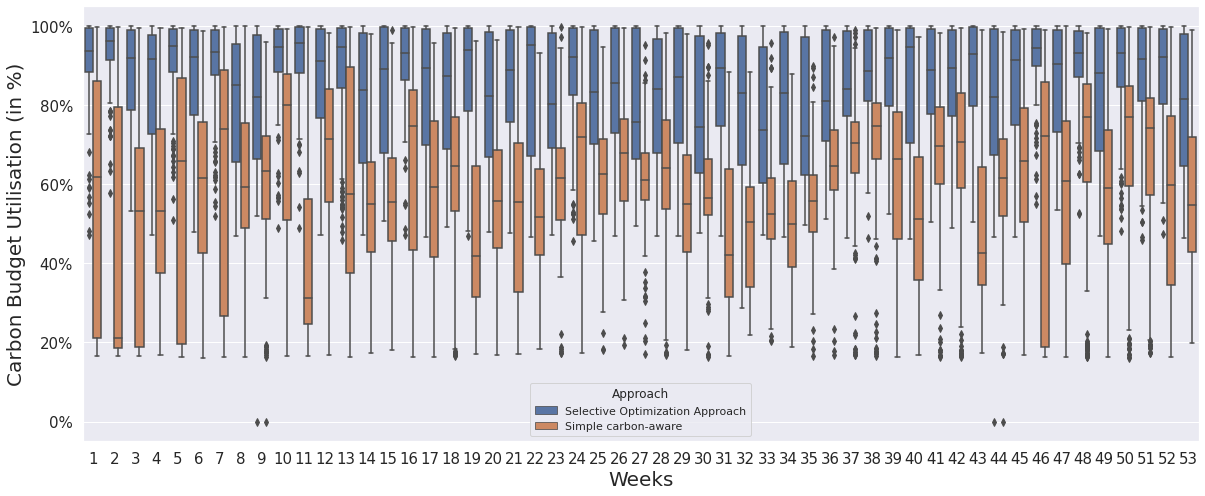

In [8]:
compareOptimalSimpleBox = sns.boxplot(x='Weeks', y='Carbon Budget Utilisation (in %)', hue='Approach', data=df)

compareOptimalSimpleBox.set_xlabel('Weeks', fontdict={'size': 20})
compareOptimalSimpleBox.set_ylabel('Carbon Budget Utilisation (in %)', fontdict={'size': 20})
percentage = [str(x) + '%' for x in [0,0,20,40,60,80,100]]
compareOptimalSimpleBox.set_yticklabels(percentage, fontdict={'size': 15})
weeks = [str(x) for x in range(1,54)]
compareOptimalSimpleBox.set_xticklabels(weeks, fontdict={'size': 15})

In [9]:
# Save plot to disk
fig = compareOptimalSimpleBox.get_figure()
fig.savefig("../img/comparingCBU_boxplot_weekly.png", bbox_inches = 'tight')

In [10]:
#Statistics
count = 0
for i in range(8760):
    if optimal_cb[i] == simple_cb[i]:
        count += 1

print("Number of times Selective is the same as Simple: " + str(count))
print("Percentage of times Selective is the same as Simple: " + str(count/8760))

count = 0
for i in range(8760):
    if optimal_cb[i] > simple_cb[i]:
        count += 1


print("Number of times Selective is better than Simple: " + str(count))
print("Percentage of times Selective is better than Simple: " + str(count/8760))


print("Lowest Selective: " + str(sorted(optimal_cb)[2]))
print("Lowest Simple: " + str(sorted(simple_cb)[2]))

print("Highest Selective: " + str(max(optimal_cb)))
print("Highest Simple: " + str(max(simple_cb)))

#user_total_annually = sum(clickData_hourly)
carbonEmission_2020 = calcCarbonEmissionFromEnergyDemand(calcEnergyDemandFromAVG(clickData_hourly_2014),ci_data_2020)
carbonEmission_2020 = sum(carbonEmission_2020) # / 8784)* 8760 # Leap Year


carbonBudget_anually = carbonEmission_2020 * 0.92
print("Total Budget utilization Selective: " + str(sum(optimization_result["ce"]) / carbonBudget_anually *100))


Number of times Selective is the same as Simple: 337
Percentage of times Selective is the same as Simple: 0.038470319634703196
Number of times Selective is better than Simple: 8419
Percentage of times Selective is better than Simple: 0.9610730593607306
Lowest Selective: 0.28691931702051693
Lowest Simple: 0.16170933986237215
Highest Selective: 0.9999960455594147
Highest Simple: 0.999522244144243
Total Budget utilization Selective: 84.96302012549994


## Mean Distance between both CA approaches

In [11]:
mean_distanceCA = 0
highest_gap = 0
smallest_gap = 1
for i in range(8760):
    mean_distanceCA += optimal_cb[i] - simple_cb[i]
    if (optimal_cb[i] - simple_cb[i]) > highest_gap:
        highest_gap = optimal_cb[i] - simple_cb[i]
    if (optimal_cb[i] - simple_cb[i]) < smallest_gap:
        smallest_gap = optimal_cb[i] - simple_cb[i]

print("Mean distance between Selective and Simple: " + str(round(mean_distanceCA/8760 *100,2)))
print("Highest gap in a single hour is " + str(round(highest_gap *100,2)))
print("Smallest gap in a single hour is " + str(round(smallest_gap *100,2)))

Mean distance between Selective and Simple: 26.42
Highest gap in a single hour is 82.79
Smallest gap in a single hour is -0.0


# Random EB

In [12]:
# randomEB_result
randomEB_result_cb = []
for i in range(0,8760):
    randomEB_result_cb.append(randomizedEB_result['ce'][i] / carbonBudget[(i+s) % 168])

/tmp/ipykernel_574372/2113050265.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  randomEB_comparision.set_yticklabels(percentage, fontdict={'size': 15})


Text(0, 0.5, 'Carbon Budget Utilisation (in %)')

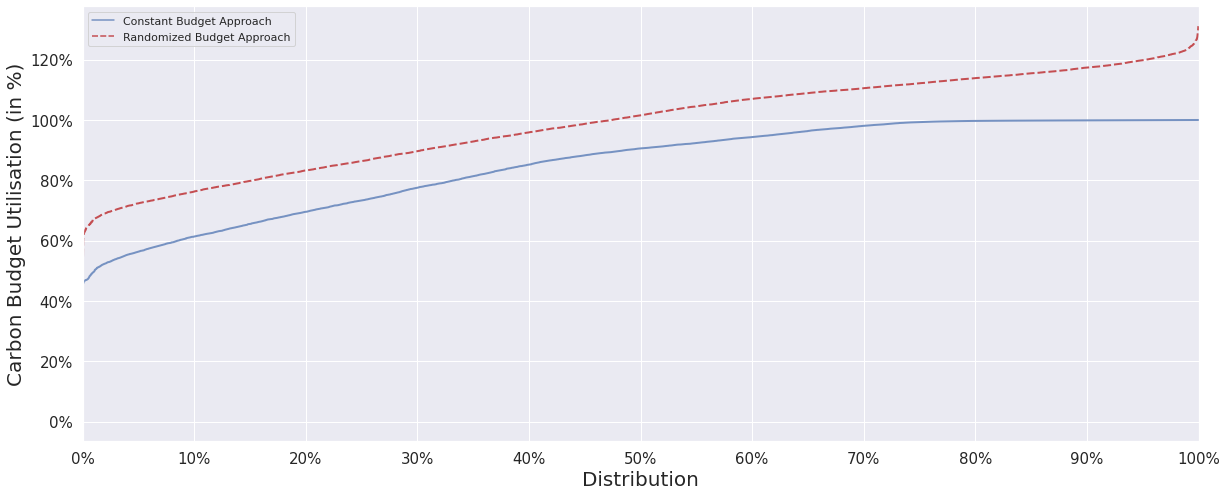

In [15]:
sns.set(rc={'figure.figsize':(20,8)})

data = pd.DataFrame({'Constant Budget Approach': sorted(optimal_cb), 'Randomized Budget Approach': sorted(randomEB_result_cb)})

randomEB_comparision = sns.lineplot(data=data, linewidth=2, palette=['#7692C2','r']) 
randomEB_comparision.set(xlim=(0,8760))
xlabels = [math.ceil(x*876) for x in range(0,11)]
percentage = [format(x*10) + '%' for x in range(0,11)]
randomEB_comparision.set_xticks(xlabels)
randomEB_comparision.set_xticklabels(percentage, fontdict={'size': 15})

percentage = [str(x) + '%' for x in [0,0,20,40,60,80,100,120]]
randomEB_comparision.set_yticklabels(percentage, fontdict={'size': 15})

randomEB_comparision.set_xlabel('Distribution', fontdict={'size': 20})
randomEB_comparision.set_ylabel('Carbon Budget Utilisation (in %)', fontdict={'size': 20})

In [16]:
# Save plot to disk
fig = randomEB_comparision.get_figure()
fig.savefig("../img/randomEB_comparisionCDF.png", bbox_inches = 'tight')

In [17]:
# Statistics
count = 0
for i in range(8760):
    if randomEB_result_cb[i] <= 1.0:
        count+=1

print("Number of times Randomized Budget is below CB: " + str(count))
print("Percentage of times Randomized Budget is below CB: " + str(count/8760*100))
print("Percentage of times Randomized Budget is above CB: " + str(100-(count/8760*100)))

distanceToBudget = []
distOptimal = []

for i in range(8760):
    distanceToBudget.append(carbonBudget[(i+s) % 168]-randomizedEB_result['ce'][i])
    distOptimal.append(carbonBudget[(i+s) % 168]-optimal_cb[i])

ed = calcEnergyDemandFromAVG(clickData_hourly_2014)
carbonEmission = calcCarbonEmissionFromEnergyDemand(ed,ci_data_2020)
q_2020 = calcQFromAVG(clickData_hourly_2014)

sumQ = 0
for i in range(len(q_2020)):
    sumQ += q_2020[i][-1]


print(sum(distanceToBudget))
print(sum(distOptimal))


print("Distance to CE2020 in %: " + str((sum(carbonEmission)-sum(randomizedEB_result['ce']))/sum(carbonEmission)*100))
print("Distance to goal in %: " + str((sum(carbonEmission)-sum(randomizedEB_result['ce']))/sum(carbonEmission)*100 -7.7))
print("Revenu Statics:")
print("Distance to Revenue of 2020 in %: " + str((sum(randomizedEB_result["user-throughput"])-sumQ)/sumQ*100))
print("Distance to Revenue of Constant Budget in %: " + str((sum(randomizedEB_result["user-throughput"])-sum(optimization_result["user-throughput"]))/sum(optimization_result["user-throughput"])*100))

Number of times Randomized Budget is below CB: 4151
Percentage of times Randomized Budget is below CB: 47.385844748858446
Percentage of times Randomized Budget is above CB: 52.614155251141554
402730636.679558
37545262833.14268
Distance to CE2020 in %: 8.96341201630618
Distance to goal in %: 1.2634120163061793
Revenu Statics:
Distance to Revenue of 2020 in %: 21.66637756959042
Distance to Revenue of Constant Budget in %: 3.943458404187266


# Comparision with LeftoverBudget approach

/tmp/ipykernel_574372/1115465016.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  sorted_CBU7.set_yticklabels(percentage, fontdict={'size': 15})


Text(0, 0.5, 'Carbon Budget Utilisation (in %)')

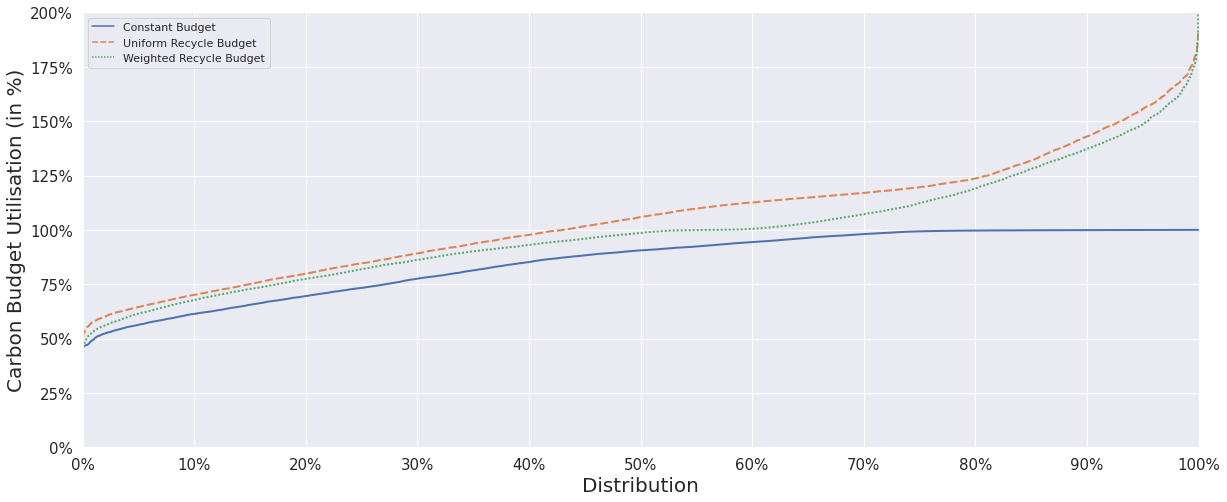

In [19]:
# Seaborn Figure size
sns.set(rc={'figure.figsize':(20,8)})

data = pd.DataFrame({'Constant Budget': sorted(optimal_cb), 'Uniform Recycle Budget': sorted(leftover_result_cb),
                     'Weighted Recycle Budget': sorted(leftover_resultWeighted_cb)})
#, 'Weighted Recycle Budget Approach': sorted(leftover_resultWeighted_eb )

sorted_CBU7 = sns.lineplot(data=data, linewidth=2)
sorted_CBU7.set(xlim=(0,8760), ylim=(0,2))
xlabels = [math.ceil(x*876) for x in range(0,11)]
percentage = [format(x*10) + '%' for x in range(0,11)]
sorted_CBU7.set_xticks(xlabels)
sorted_CBU7.set_xticklabels(percentage, fontdict={'size': 15})

percentage = [format(x*25) + '%' for x in range(0,9)]
sorted_CBU7.set_yticklabels(percentage, fontdict={'size': 15})
#sorted_EBU.xaxis.set_major_locator(ticker.FixedLocator(xlabels))
#sorted_EBU.xaxis.set_major_formatter(ticker.PercentFormatter(xlabels))
sorted_CBU7.set_xlabel('Distribution', fontdict={'size': 20})
sorted_CBU7.set_ylabel('Carbon Budget Utilisation (in %)', fontdict={'size': 20})

#sorted_EBU.axes.set_title("CDF Energy Budget Utilization",fontsize=20)

In [17]:
# Save plot to disk
fig = sorted_CBU7.get_figure()
fig.savefig("../img/CBU_cdf_withUniformRecycle.png", bbox_inches = 'tight')

In [18]:
ed = calcEnergyDemandFromAVG(clickData_hourly_2014)
carbonEmission = calcCarbonEmissionFromEnergyDemand(ed,ci_data_2020)


print("Total Carbon Emissions of Leftover Approach: " + str(sum(leftover_result['ce'])))
print("Distance to goal: " + str(sum(carbonEmission)-sum(leftover_result['ce'])))
print("Distance to goal in %: " + str((sum(carbonEmission)-sum(leftover_result['ce']))/sum(carbonEmission)*100))
print("Distance to goal in %: " + str(((sum(carbonEmission)-sum(leftover_result['ce']))/sum(carbonEmission)*100)-7.7))

print("Distance to selective optimization: " + str(sum(leftover_result['ce'])-sum(optimization_result['ce'])))
print("Distance to in %: " + str((sum(leftover_result['ce'])-sum(optimization_result['ce']))/sum(optimization_result['ce'])))


Total Carbon Emissions of Leftover Approach: 37372770332.104996
Distance to goal: 3426803200.9908676
Distance to goal in %: 8.399115246170668
Distance to goal in %: 0.6991152461706678
Distance to selective optimization: 5481384449.826
Distance to in %: 0.17187664625361507


In [19]:
leftover_result2 = pd.read_csv("../results/7_leftoverWeighted_optimization_result.csv")
print("Distance to selective optimization: " + str(sum(leftover_result2['ce'])-sum(optimization_result['ce'])))
print("Distance to in %: " + str((sum(leftover_result2['ce'])-sum(optimization_result['ce']))/sum(optimization_result['ce'])*100))


print("Distance to in Unifrom Recycle in %: " + str((sum(leftover_result2['ce'])-sum(leftover_result['ce']))/sum(optimization_result['ce'])*100))

print("Distance to goal: " + str(sum(carbonEmission)-sum(leftover_result2['ce'])))


print("Total Budget Utilisation for Weighted Leftover: " + str((1-sum(leftover_result2['ce'])/sum(carbonEmission))*100))

Distance to selective optimization: 5501708319.820927
Distance to in %: 17.251393025469135
Distance to in Unifrom Recycle in %: 0.06372840010762833
Distance to goal: 3406479330.995941
Total Budget Utilisation for Weighted Leftover: 8.349301318634295


In [18]:
leftover_resultEB = pd.read_csv("../results/8_leftoverEB_optimization_result.csv")
print("Distance to selective optimization: " + str(sum(leftover_resultEB['ce'])-sum(optimization_result['ce'])))
print("Distance to in %: " + str((sum(leftover_resultEB['ce'])-sum(optimization_result['ce']))/sum(optimization_result['ce'])*100))


print("Distance to in Unifrom Recycle in %: " + str((sum(leftover_resultEB['ce'])-sum(leftover_result['ce']))/sum(optimization_result['ce'])*100))

print("Distance to goal: " + str(sum(carbonEmission)-sum(leftover_resultEB['ce'])))
print("Distance to Las emissions in %: " + str((sum(carbonEmission)-sum(leftover_resultEB['ce']))/sum(carbonEmission)*100))
print("Distance to goal in %: " + str(((sum(carbonEmission)-sum(leftover_resultEB['ce']))/sum(carbonEmission)*100)-7.7))

Distance to selective optimization: 3366176781.062969
Distance to in %: 10.555128565088305
Distance to in Unifrom Recycle in %: -6.632536060273201
Distance to goal: 5542010869.753899
Distance to Las emissions in %: 13.583501958073951
Distance to goal in %: 5.883501958073951


# Hourly EB Recalc with Leftover approach

## Mean Distance between both CA-Approaches

# Ende 

# Total Carbon Emissions

In [ ]:
optimalCE = sum([optimization_result["ed"][i] * ci_data_2021_hourly[i] for i in range(0,8760)])
simpleCA_resultCE = sum([simpleCA_result["ed"][i] * ci_data_2021_hourly[i] for i in range(0,8760)])
leftover_resultCE = sum([leftover_result["ed"][i] * ci_data_2021_hourly[i] for i in range(0,8760)])
leftover_resultWeightedCE = sum([leftover_resultWeighted["ed"][i] * ci_data_2021_hourly[i] for i in range(0,8760)])
randomEB_result = sum([randomEB_result["ed"][i] * ci_data_2021_hourly[i] for i in range(0,8760)])

NameError: name 'ci_data_2021_hourly' is not defined

# Comparing Budget Leftover

In [ ]:
s_hourlyAVG = getS_hourlyAVG(clickData_hourly)

year = 2021
weekday_frequency = weekdayfrequency(year)
s = weekday_frequency.index(53)*24
#energyBudget_annually_2021 = 18018969861.040535 * 0.92 # ToDo recalulate and add to lib.py
#eb_perUser = energyBudget_annually_2021 / user_total_annually
#eb_perHour = [s_hourlyAVG[i] * eb_perUser for i in range(len(s_hourlyAVG))]


user_total_annually = sum(clickData_hourly)
carbonEmission_2020 = calcCarbonEmissionFromEnergyDemand(calcEnergyDemandFromAVG(clickData_hourly))
carbonEmission_2020 = sum(carbonEmission_2020) # / 8784)* 8760 # Leap Year

#carbonBudget_anually = sum(calcCarbonEmissionFromEnergyDemand(calcEnergyDemandFromAVG()))
carbonBudget_anually = carbonEmission_2020 * 0.92
cb_perUser = carbonBudget_anually / user_total_annually
cb_perHour = [s_hourlyAVG[i] * cb_perUser for i in range(len(s_hourlyAVG))]

In [ ]:
for i in range(100):
    x = (simpleCA_result['ed'][i]*ci_data_2021_hourly[i])/cb_perHour[(96+i) % 168]
    if x > 1.0:
        print(x)

cb = calcCarbonBudgetFrom_AVG_CE(clickData_hourly)

# 01.01.2021 was a Friday and 31.12.2021 was a Friday
ci_data_2021_daily = []
offset00 = []
# len(optimization_result['ed'])-1
for i in range(365):
    for j in range(24):
        eb_temp = cb / ci_data_2021_hourly[i*24+j]
        offset00.append((eb_temp - optimization_result['ed'][i*24+j])/eb_temp)

offset = pd.DataFrame({'Opti': offset00})

for i in range(len(simpleCA_result)):
    simple_leftover = (simpleCA_result["leftoverBudget"] / eb_temp)

1.1729215532632262
1.183218319901027
1.0122882317972501
1.1792877023536938
1.1878052496998328
1.1612951719895734
1.077997146506592
1.0081535066606007
1.066712758265039
1.2017627064638465
1.3164805398693504
1.3600225593796549
1.443073768007282
1.5264773758496217
1.4613852160797445
1.3808832178537662
1.4374932212784803
1.2104130156584898
1.0408945546841828
1.1864070464103174
1.1414537386620756
1.0837555110125332
1.1045234540520457
1.3543944214945094
1.3300807696972272
1.0782296282694976


## Hourly Optimization Approach vs. Simple CA

/tmp/ipykernel_11913/1549948294.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb_leftover.set_yticklabels(percentage, fontdict={'size': 15})


Text(0.5, 1.0, 'Carbon Budget Utilization')

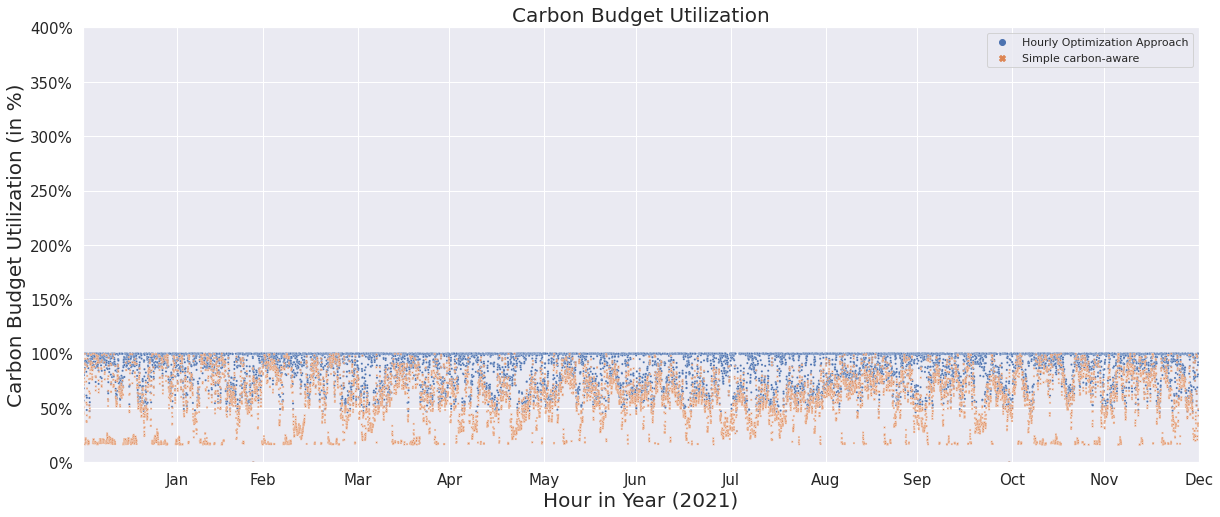

In [ ]:
# Seaborn Figure size
sns.set(rc={'figure.figsize':(20,8)})

data = pd.DataFrame({'Hourly Optimization Approach': optimal_cb, 'Simple carbon-aware': simple_cb})# , 'Mathematical Optimal': opBase

cb_leftover = sns.scatterplot(data=data, s=5)

cb_leftover.set(xlim=(0,8760),ylim=(0,4))
cb_leftover.set_xlabel('Hour in Year (2021)', fontdict={'size': 20})
cb_leftover.set_ylabel('Carbon Budget Utilization (in %)', fontdict={'size': 20})

DaysMonths = [31,28,31,30,31,30,31,31,30,31,30,31]
hoursMonths = [0] * 13
for i in range(len(DaysMonths)+1):
    hoursMonths[i] = sum(DaysMonths[0:i])*24
cb_leftover.set_xticks(hoursMonths)
months = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cb_leftover.set_xticklabels(months,fontdict={'size': 15})

percentage = [format(x*50) + '%' for x in range(0,11)]
#sorted_EBU.set_yticks(ylabels)
cb_leftover.set_yticklabels(percentage, fontdict={'size': 15})

cb_leftover.axes.set_title("Carbon Budget Utilization",fontsize=20)

In [ ]:
# Save plot to disk
fig = cb_leftover.get_figure()
fig.savefig("../img/comparingCBU1.png", bbox_inches = 'tight')

## Compared with mathematical optimum

In [ ]:
data = pd.DataFrame({'Hourly Optimization Approach': optimal_cb, 'Simple carbon-aware': simple_cb, 'Mathematical Optium':op_cb})# , 'Mathematical Optimal': opBase
cb_leftover = sns.scatterplot(data=data, s=10)

cb_leftover.set(xlim=(0,8760))
cb_leftover.set_xlabel('Hour in Year (2021)', fontdict={'size': 15})
cb_leftover.set_ylabel('Carbon Budget Utilization (in %)', fontdict={'size': 15})

cb_leftover.axes.set_title("Carbon Budget Utilization",fontsize=20)

NameError: name 'op_cb' is not defined

In [ ]:
# Save plot to disk
fig = cb_leftover.get_figure()
fig.savefig("../img/comparingCBU2.png", bbox_inches = 'tight')